In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import os
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
vids = [np.load('P96/rgb_frames/P96_101stab.npy', allow_pickle=True),
        np.load('P96/rgb_frames/P96_104stab.npy', allow_pickle=True),
        np.load('P96/rgb_frames/P96_105stab.npy', allow_pickle=True),
        np.load('P96/rgb_frames/P96_106stab.npy', allow_pickle=True),
        np.load('P96/rgb_frames/P96_107stab.npy', allow_pickle=True),
        np.load('P96/rgb_frames/P96_108stab.npy', allow_pickle=True),
        np.load('P96/rgb_frames/P96_109stab.npy', allow_pickle=True),
        np.load('P96/rgb_frames/P96_112stab.npy', allow_pickle=True),
        np.load('P96/rgb_frames/P96_114stab.npy', allow_pickle=True),
        np.load('P96/rgb_frames/P96_116stab.npy', allow_pickle=True),
        np.load('P96/rgb_frames/P96_117stab.npy', allow_pickle=True),
        np.load('P95/rgb_frames/P95_101stab.npy', allow_pickle=True),
        np.load('P95/rgb_frames/P95_102stab.npy', allow_pickle=True),
        np.load('P95/rgb_frames/P95_103stab.npy', allow_pickle=True),
        np.load('P95/rgb_frames/P95_104stab.npy', allow_pickle=True),
        np.load('P95/rgb_frames/P95_105stab.npy', allow_pickle=True),
        np.load('P95/rgb_frames/P95_106stab.npy', allow_pickle=True),
        np.load('P95/rgb_frames/P95_107stab.npy', allow_pickle=True),
        np.load('P95/rgb_frames/P95_108stab.npy', allow_pickle=True),
        np.load('P95/rgb_frames/P95_109stab.npy', allow_pickle=True),
        np.load('P95/rgb_frames/P95_110stab.npy', allow_pickle=True),
        np.load('P95/rgb_frames/P95_111stab.npy', allow_pickle=True)]

In [3]:
vids = np.array(vids)

In [4]:
data = []
for vid in vids:
    for series in vid:
        for i in range(len(series) - 5):
            mini_series = []
            for j in range(5):
                mini_series.append(series[i+j])
            data.append(mini_series)

In [5]:
data = np.array(data)

In [6]:
data.shape

(1620, 5, 3)

In [7]:
np.random.shuffle(data)

In [8]:
x = []
y = []
for d in data:
    row = []
    for i in range(5):
        row.append(d[i][:2])
    x.append(row)
    y.append(d[i][2])
x = np.array(x)
y = np.array(y)

In [9]:
x_data = []
for point in x:
    norm_vals = []
    for i in range(5):
        norm_vals.append(np.linalg.norm(point[i]))
    x_data.append(norm_vals)
x_data = np.array(x_data)

In [10]:
m = max(x_data.flatten())

In [11]:
x_data2 = x_data/m

In [12]:
n = int(len(x_data2)*0.8)

In [13]:
x_train, x_test = np.split(x_data2, [n])
y_train, y_test = np.split(y, [n])
y_train=to_categorical(y_train,2)
y_test=to_categorical(y_test,2)

In [14]:
model = Sequential()
model.add(Dense(10, input_dim=5, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1296/1296 [==============================] - 0s 179us/step - loss: 0.5551 - acc: 0.8032
Epoch 2/100
1296/1296 [==============================] - 0s 24us/step - loss: 0.4188 - acc: 0.8032
Epoch 3/100
1296/1296 [==============================] - 0s 22us/step - loss: 0.3454 - acc: 0.8032
Epoch 4/100
1296/1296 [==============================] - 0s 22us/step - loss: 0.3046 - acc: 0.8032
Epoch 5/100
1296/1296 [==============================] - 0s 27us/step - loss: 0.2610 - acc: 0.8040
Epoch 6/100
1296/1296 [==============================] - 0s 24us/step - loss: 0.2188 - acc: 0.8819
Epoch 7/100
1296/1296 [==============================] - 0s 27us/step - loss: 0.1867 - acc: 0.9390
Epoch 8/100
1296/1296 [==============================] - 0s 24us/step - loss: 0.1668 - acc: 0.9236
Epoch 9/100
1296/1296 [==============================] - 0s 27us/step - loss: 0.1553 - acc: 0.9228
Epoc

1296/1296 [==============================] - 0s 23us/step - loss: 0.1296 - acc: 0.9252
Epoch 60/100
1296/1296 [==============================] - 0s 25us/step - loss: 0.1298 - acc: 0.9267
Epoch 61/100
1296/1296 [==============================] - 0s 23us/step - loss: 0.1296 - acc: 0.9275
Epoch 62/100
1296/1296 [==============================] - 0s 22us/step - loss: 0.1294 - acc: 0.9252
Epoch 63/100
1296/1296 [==============================] - 0s 19us/step - loss: 0.1294 - acc: 0.9252
Epoch 64/100
1296/1296 [==============================] - 0s 22us/step - loss: 0.1294 - acc: 0.9252
Epoch 65/100
1296/1296 [==============================] - 0s 21us/step - loss: 0.1299 - acc: 0.9259
Epoch 66/100
1296/1296 [==============================] - 0s 20us/step - loss: 0.1295 - acc: 0.9267
Epoch 67/100
1296/1296 [==============================] - 0s 22us/step - loss: 0.1295 - acc: 0.9275
Epoch 68/100
1296/1296 [==============================] - 0s 21us/step - loss: 0.1292 - acc: 0.9244
Epoch 69/100


In [16]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(test_loss)
print(test_accuracy)

324/324 [==============================] - 0s 83us/step
0.09092120922825954
0.941358024691358


In [40]:
new_test = np.load('P99/rgb_frames/P99_107stab.npy', allow_pickle=True)

In [41]:
new_test

array([[[ -28.37921143,  -39.31248474,    1.        ],
        [ -45.70471191,  -38.95214844,    1.        ],
        [ -49.61859131,  -45.2301178 ,    1.        ],
        [ -52.06066895,  -50.90625   ,    1.        ],
        [ -80.60552979,  -63.9899292 ,    1.        ],
        [ -83.14001465,  -75.7538147 ,    1.        ],
        [-122.6975708 , -103.54504395,    1.        ],
        [-126.04559326, -127.87234497,    1.        ],
        [-148.46765137, -158.46879578,    1.        ],
        [-173.44543457, -189.05802917,    1.        ],
        [-213.21533203, -223.01554871,    0.        ],
        [-257.73468018, -261.00395203,    0.        ],
        [-305.78051758, -301.83625793,    0.        ],
        [-362.33178711, -345.69969177,    0.        ],
        [-423.7019043 , -407.75440979,    0.        ],
        [-488.76037598, -465.65103149,    0.        ],
        [-551.83056641, -521.30487061,    0.        ],
        [-617.12902832, -559.6661377 ,    0.        ],
        [-

In [42]:
x1 = []
y1 = []
for i in range(len(new_test[0]) - 5):
    point = []
    for j in range(5):
        point.append(np.linalg.norm(new_test[0][i+j][:2]))
    x1.append(point)
    y1.append(new_test[0][i+j][2])
x1 = np.array(x1)
y1 = np.array(y1)

In [43]:
xtest1 = x1/m

In [44]:
m

1106.50695399817

In [45]:
y_pred = model.predict(xtest1)
y_vals = []
for val in y_pred:
    y_vals.append(np.argmax(val))

In [46]:
print(y1)
print(y_vals)

[1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


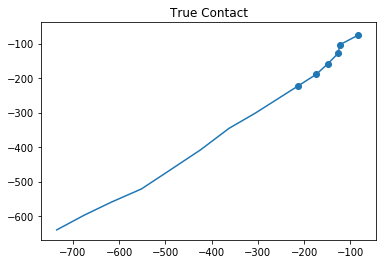

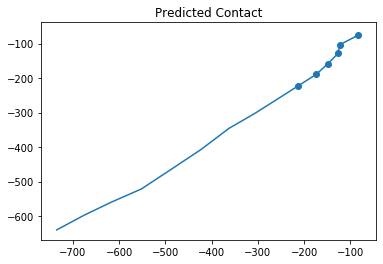

In [47]:
plotx = new_test[0][5:, 0]
ploty = new_test[0][5:, 1]
predx = []
predy = []
truex = []
truey = []
for i in range(len(y1)):
    if y1[i] == 1:
        truex.append(plotx[i])
        truey.append(ploty[i])
for i in range(len(y_vals)):
    if y_vals[i] == 1:
        predx.append(plotx[i])
        predy.append(ploty[i])
    
plt.figure()
plt.title('True Contact')
plt.plot(plotx, ploty)
plt.scatter(truex, truey)
plt.figure()
plt.title('Predicted Contact')
plt.plot(plotx, ploty)
plt.scatter(predx, predy)

